**Table of contents**<a id='toc0_'></a>    
- [Libraries](#toc1_)    
- [Data](#toc2_)    
  - [Wine Quality 분포](#toc2_1_)    
  - [Red / White 와인별로 Quality 분포](#toc2_2_)    
- [레드와인 화이트와인 분류](#toc3_)    
  - [label 분리](#toc3_1_)    
  - [Train / Test 데이터 분리](#toc3_2_)    
    - [Train / Test 의 Quality 데이터 분포](#toc3_2_1_)    
  - [Decision Tree로 지도 학습](#toc3_3_)    
    - [Accuracy Score](#toc3_3_1_)    
- [MinMaxScaler, StandardScaler](#toc4_)    
  - [각 feature의 값 분포](#toc4_1_)    
  - [MinMaxScaler, StandardScaler 적용](#toc4_2_)    
  - [Scaler 후 각 feature의 값 분포](#toc4_3_)    
    - [MinMaxScaler](#toc4_3_1_)    
    - [StandardScaler](#toc4_3_2_)    
- [Scaler 적용 후 Decision Tree 학습](#toc5_)    
  - [MinMaxScaler 적용 후 다시 학습](#toc5_1_)    
  - [StandardScaler 적용 후 다시 학습](#toc5_2_)    
  - [Decision Tree 시각화](#toc5_3_)    
  - [중요 feature 확인](#toc5_4_)    
- [Quality 이진 분류](#toc6_)    
  - [데이터 분리](#toc6_1_)    
  - [Decision Tree 학습](#toc6_2_)    
  - [Accuracy Score](#toc6_3_)    
  - [Decision Tree 시각화](#toc6_4_)    
  - [quality 컬럼을 제외하고 다시 학습](#toc6_5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Libraries](#toc0_)

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import tree

# <a id='toc2_'></a>[Data](#toc0_)

In [2]:
red_url = 'https://raw.githubusercontent.com/PinkWink/forML_study_data/refs/heads/main/data/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/forML_study_data/refs/heads/main/data/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

In [3]:
display(red_wine.head())
display(white_wine.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
white_wine.columns, red_wine.columns

(Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
        'pH', 'sulphates', 'alcohol', 'quality'],
       dtype='object'),
 Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
        'pH', 'sulphates', 'alcohol', 'quality'],
       dtype='object'))

- 두 df를 하나의 df로 합침

In [6]:
red_wine['color'] = 1
white_wine['color'] = 0

wine = pd.concat([red_wine, white_wine])
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [ ]:
sorted(wine['quality'].unique())

[3, 4, 5, 6, 7, 8, 9]

## <a id='toc2_1_'></a>[Wine Quality 분포](#toc0_)

In [ ]:
fig = px.histogram(wine, x='quality')
fig.show()

## <a id='toc2_2_'></a>[Red / White 와인별로 Quality 분포](#toc0_)

In [ ]:
fig = px.histogram(
    wine, 
    x='quality',
    color='color',
    color_discrete_map= {
        1: 'red',
        0: 'white'
    }
)
fig.show()

# <a id='toc3_'></a>[레드와인 화이트와인 분류](#toc0_)

## <a id='toc3_1_'></a>[label 분리](#toc0_)

In [ ]:
X = wine.drop(['color'], axis=1)
y = wine['color']

## <a id='toc3_2_'></a>[Train / Test 데이터 분리](#toc0_)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
np.unique(y_train, return_counts=True)

(array([0, 1]), array([3913, 1284]))

### <a id='toc3_2_1_'></a>[Train / Test 의 Quality 데이터 분포](#toc0_)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=X_train['quality'], name='Train'))
fig.add_trace(go.Histogram(x=X_test['quality'], name='Test'))

fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.75)
fig.show()

## <a id='toc3_3_'></a>[Decision Tree로 지도 학습](#toc0_)

In [ ]:
wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

### <a id='toc3_3_1_'></a>[Accuracy Score](#toc0_)

In [ ]:
y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Accuracy: ', accuracy_score(y_train, y_pred_tr))
print('Test Accuracy: ', accuracy_score(y_test, y_pred_test))

Train Accuracy:  0.9553588608812776
Test Accuracy:  0.9569230769230769


# <a id='toc4_'></a>[MinMaxScaler, StandardScaler](#toc0_)

## <a id='toc4_1_'></a>[각 feature의 값 분포](#toc0_)

- 컬럼들의 최대/최소 범위가 각각 다르고, 평균과 분산이 각각 다름
- 특성(feature)의 편향 문제는 최적의 모델을 찾는데 방해가 될수도 있음
<br>

-> 이런 이유로 값의 범위를 맞춰주려고 함(`Scaler`)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y=X['fixed acidity'], name='fixed acidity'))
fig.add_trace(go.Box(y=X['chlorides'], name='chlorides'))
fig.add_trace(go.Box(y=X['quality'], name='quality'))

fig.show()

## <a id='toc4_2_'></a>[MinMaxScaler, StandardScaler 적용](#toc0_)

In [32]:
MMS = MinMaxScaler()
SS = StandardScaler()

SS.fit(X)
MMS.fit(X)

X_ss = SS.transform(X)
X_mms = MMS.transform(X)

In [ ]:
X_ss_pd = pd.DataFrame(X_ss, columns=X.columns)
X_mms_pd = pd.DataFrame(X_mms, columns=X.columns)

## <a id='toc4_3_'></a>[Scaler 후 각 feature의 값 분포](#toc0_)

### <a id='toc4_3_1_'></a>[MinMaxScaler](#toc0_)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y=X_mms_pd['fixed acidity'], name='fixed acidity'))
fig.add_trace(go.Box(y=X_mms_pd['chlorides'], name='chlorides'))
fig.add_trace(go.Box(y=X_mms_pd['quality'], name='quality'))

fig.show()

### <a id='toc4_3_2_'></a>[StandardScaler](#toc0_)

- 평균을 0, 표준편차를 1로 두도록 하는 scaler

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y=X_ss_pd['fixed acidity'], name='fixed acidity'))
fig.add_trace(go.Box(y=X_ss_pd['chlorides'], name='chlorides'))
fig.add_trace(go.Box(y=X_ss_pd['quality'], name='quality'))

fig.show()

# <a id='toc5_'></a>[Scaler 적용 후 Decision Tree 학습](#toc0_)

## <a id='toc5_1_'></a>[MinMaxScaler 적용 후 다시 학습](#toc0_)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_mms_pd, y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train accuacy: ', accuracy_score(y_train, y_pred_tr))
print('Test accuacy: ', accuracy_score(y_test, y_pred_test))

Train accuacy:  0.9553588608812776
Test accuacy:  0.9569230769230769


## <a id='toc5_2_'></a>[StandardScaler 적용 후 다시 학습](#toc0_)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_ss_pd, y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train accuacy: ', accuracy_score(y_train, y_pred_tr))
print('Test accuacy: ', accuracy_score(y_test, y_pred_test))

Train accuacy:  0.9553588608812776
Test accuacy:  0.9569230769230769


- 와인 데이터셋에는 MinMaxScaler와 StandardScaler의 우열을 가릴 수 없음

## <a id='toc5_3_'></a>[Decision Tree 시각화](#toc0_)

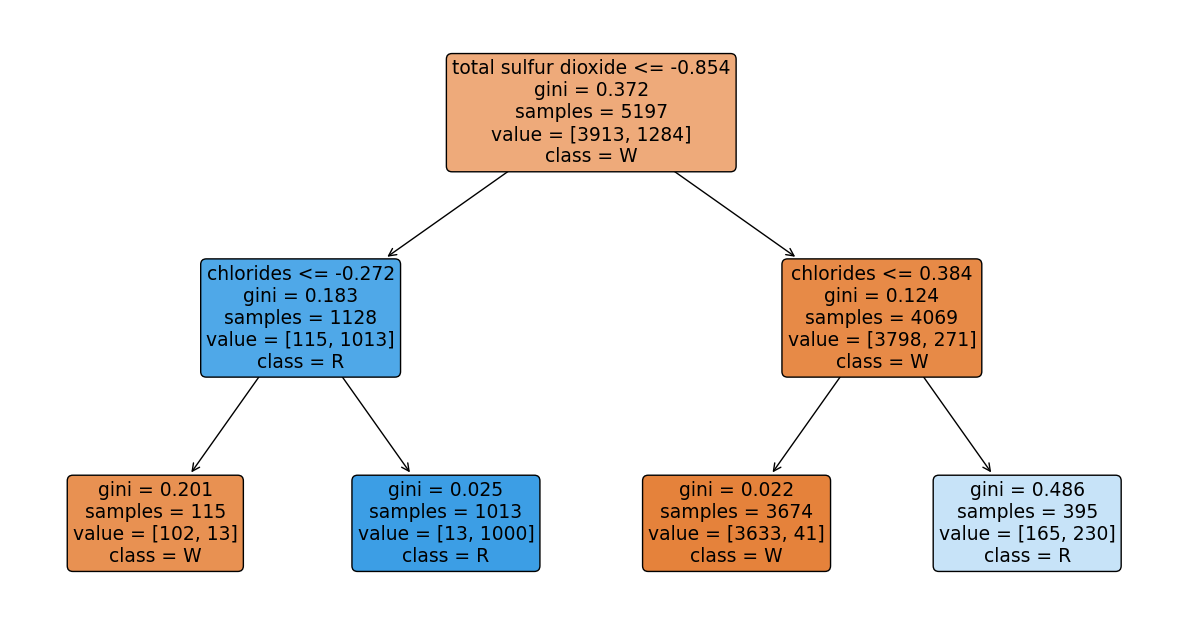

In [ ]:
fig = plt.figure(figsize=(15, 8))
_ = tree.plot_tree(
    wine_tree,
    feature_names=list(X_train.columns),
    class_names=['W', 'R'],
    rounded=True,
    filled=True
)

## <a id='toc5_4_'></a>[중요 feature 확인](#toc0_)

In [41]:
dict(zip(X_train.columns, wine_tree.feature_importances_))

{'fixed acidity': 0.0,
 'volatile acidity': 0.0,
 'citric acid': 0.0,
 'residual sugar': 0.0,
 'chlorides': 0.24230360549660776,
 'free sulfur dioxide': 0.0,
 'total sulfur dioxide': 0.7576963945033922,
 'density': 0.0,
 'pH': 0.0,
 'sulphates': 0.0,
 'alcohol': 0.0,
 'quality': 0.0}

- max_depth를 2로 했기 때문에 중요 feature 수의 적음

# <a id='toc6_'></a>[Quality 이진 분류](#toc0_)
-  `quality` 컬럼의 데이터를 맛있다(1) 맛없다(0)로 이진화

In [54]:
np.unique(wine['quality'])

array([3, 4, 5, 6, 7, 8, 9])

In [ ]:
wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
 13  taste                 6497 non-null   float64
dtypes: float64(12), int64(2)
memory usage: 761.4 KB


## <a id='toc6_1_'></a>[데이터 분리](#toc0_)

In [ ]:
X = wine.drop(['taste'], axis=1)
y = wine['taste']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

## <a id='toc6_2_'></a>[Decision Tree 학습](#toc0_)

In [ ]:
wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

## <a id='toc6_3_'></a>[Accuracy Score](#toc0_)

In [46]:
y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Accuracy : ', accuracy_score(y_train, y_pred_tr))
print('Test Accuracy : ', accuracy_score(y_test, y_pred_test))

Train Accuracy :  1.0
Test Accuracy :  1.0


- 100점이라는 점수.. Tree를 확인해서 어떻게 분류했는지 확인

## <a id='toc6_4_'></a>[Decision Tree 시각화](#toc0_)

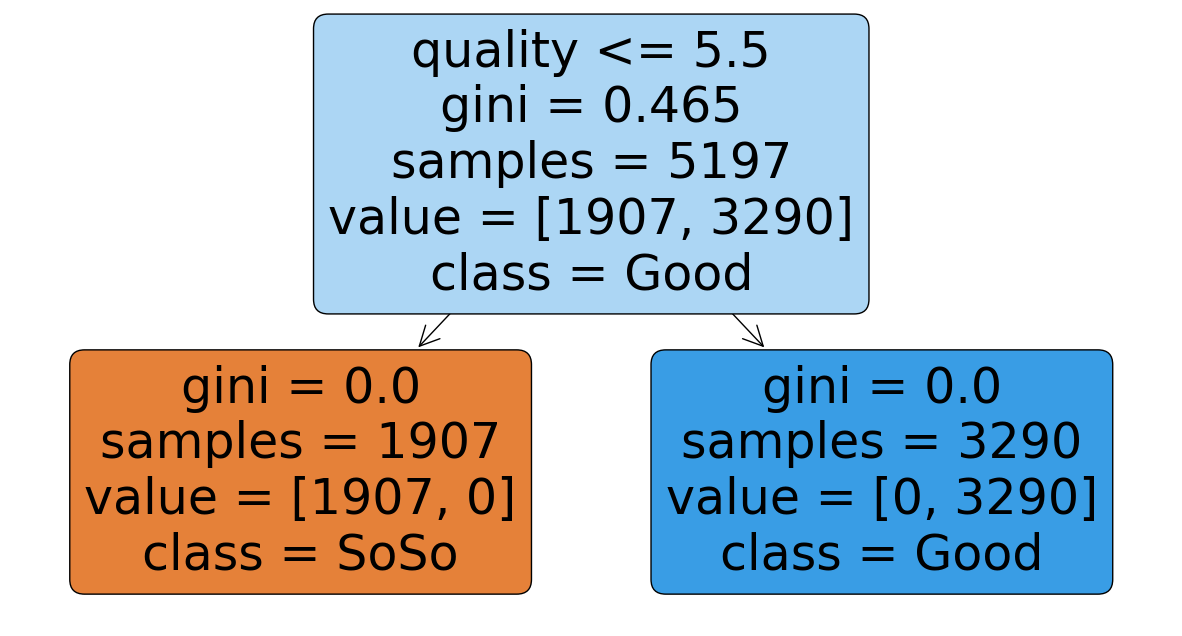

In [48]:
fig = plt.figure(figsize=(15, 8))
_ = tree.plot_tree(
    wine_tree,
    feature_names=list(X_train.columns),
    class_names=["SoSo", "Good"],
    rounded=True,
    filled=True                
)

quality 컬럼으로 taste 컬럼을 만들었으니 quality 컬럼은 제거했어야 했음..! <br>
모델이 quality 컬럼만 보고 분류를 진행했음

## <a id='toc6_5_'></a>[quality 컬럼을 제외하고 다시 학습](#toc0_)

In [49]:
X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [50]:
y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Accuracy : ', accuracy_score(y_train, y_pred_tr))
print('Test Accuracy : ', accuracy_score(y_test, y_pred_test))

Train Accuracy :  0.7294593034442948
Test Accuracy :  0.7161538461538461


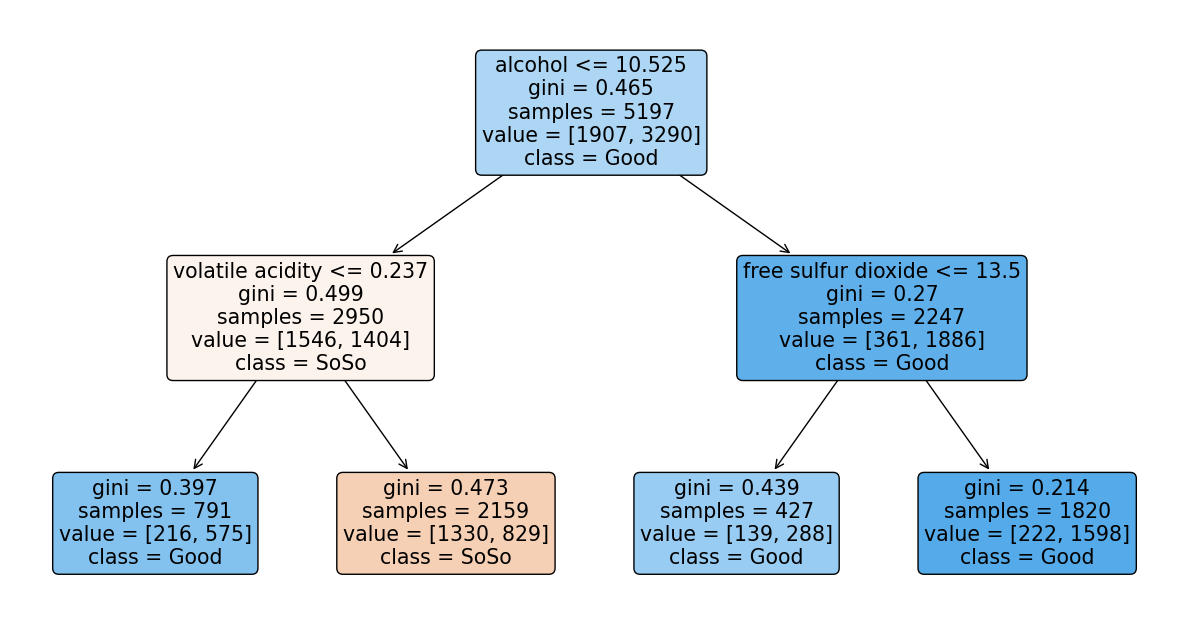

In [51]:
fig = plt.figure(figsize=(15, 8))
_ = tree.plot_tree(
    wine_tree,
    feature_names=list(X_train.columns),
    class_names=["SoSo", "Good"],
    rounded=True,
    filled=True                
)

In [52]:
dict(zip(X_train.columns, wine_tree.feature_importances_))

{'fixed acidity': 0.0,
 'volatile acidity': 0.2714166536849971,
 'citric acid': 0.0,
 'residual sugar': 0.0,
 'chlorides': 0.0,
 'free sulfur dioxide': 0.057120460609986594,
 'total sulfur dioxide': 0.0,
 'density': 0.0,
 'pH': 0.0,
 'sulphates': 0.0,
 'alcohol': 0.6714628857050162,
 'color': 0.0}